In [1]:
import polars as pl
# import pandas as pd
import tqdm
import numpy as np

In [3]:
df = pl.read_csv('/root/workspace/Learning_Equality/xlm-roberta-base/oof_df.csv')

In [4]:
correlations_df = pl.read_csv('../data/row/correlations.csv')

In [21]:
correlations_df[8, 'content_ids']

'c_005e793bd0c5 c_066737fa5146 c_08b2070f92e0 c_0a0f0cfcd01a c_0e3353b058f0 c_0eda77684335 c_0f16d374f415 c_10ca1869c758 c_10dbed87d839 c_11181d0b95aa c_115c5b863574 c_1cd9f807f8e5 c_1f20565b1381 c_222e318d6d8a c_29633da013a9 c_2cd238e941f1 c_30b3480d92f8 c_34bc70d326d5 c_3a12b23519f3 c_3a19935d0e70 c_3bc84cfa9818 c_3cf6ef1121e4 c_470dab588a4d c_48562a9fd7a5 c_4a017a7b88b1 c_5471bafde27d c_5838ba054863 c_5a3a979a3cd9 c_5bac5e027198 c_5f25b381c46a c_5f4b5200a725 c_6062d2e46506 c_60ec15e6b535 c_65e1a1125573 c_683bd6b717fa c_6a1b4e7d6de9 c_6a8228c8357e c_6aef7c2f724c c_6b9542168065 c_6f356bf86b85 c_6fee5dd33c0d c_7265b169bc76 c_738debbd624a c_7971ba5f03c4 c_7d1a59c7044d c_7e2f3739ad0a c_821fc6753fa7 c_8e29ba77df5b c_8ee98ffbb4ec c_91d5815c5c05 c_9520d0abdfe4 c_964f18665f78 c_97f7c60035ea c_a0133f95e907 c_a5545a2ff5ca c_a99a9622f854 c_b44c206ad756 c_b578b555904e c_b6819b9c64df c_b92a55cf1879 c_bebd175342f5 c_bef2c010d6f9 c_bef55777e57b c_c69fc19ab8f2 c_cef9b08c48c4 c_d2cf189bb4ac c_d32102f

In [6]:
labels = []
for idx, df_ in tqdm.tqdm(df.groupby('topic_id'), total = len(df.unique(subset=["topic_id"]))):
    topic_id = idx
    content_ids = df_['content_id'].to_numpy()
    isin_list = np.array(correlations_df.filter(pl.col("topic_id")==topic_id)['content_ids'].item().split(' '))
    label = np.isin(content_ids, isin_list)
    labels.extend(label)

100%|██████████| 12303/12303 [00:14<00:00, 832.46it/s]


In [9]:
df = df.with_column(
    pl.Series('label', labels)
)

<ipython-input-9-8088ab0c7b57>:1: DeprecationWarning: `with_column` has been deprecated in favor of `with_columns`. This method will be removed in version 0.17.0
  df = df.with_column(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25acc7c3d0>,
      dtype=object)

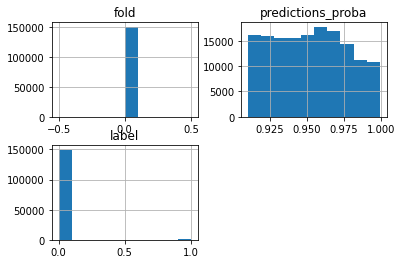

In [40]:
df.filter(pl.col("predictions_proba")>0.91).to_pandas().hist()

In [20]:
correlations_df

topic_id,content_ids
str,str
"""t_00004da3a1b2...","""c_1108dd0c7a5d..."
"""t_00068291e9a4...","""c_639ea2ef9c95..."
"""t_00069b63a70a...","""c_11a1dc0bfb99..."
"""t_0006d41a73a8...","""c_0c6473c3480d..."
"""t_0008768bdee6...","""c_34e1424229b4..."
"""t_0008a1bd84ba...","""c_7ff92a954a3d..."
"""t_000d1fb3f2f5...","""c_07f1d0eec4b2..."
"""t_000feba42136...","""c_2bbc650030f4..."
"""t_00102869fbcb...","""c_005e793bd0c5..."
